# Avaliação Aula 08 - Introdução Ciência de Dados

# Exercicio 1
Considere a base de dados <font color=red>'vertebralcolumn-3C'</font>. Calcule a precisão na classificação usando SVM com C=10. Use o código abaixo. Arrendonde o valor para uma casa decimal.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. 0.2</b><br>
<b>b. 0.5</b><br>
<b>c. 0.8</b><br>
<b>d. 1.0</b><br>
<b>e. 0.1</b><br>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.svm import SVC
from sklearn.metrics import precision_score

model = SVC(C = 10, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Resposta: ", '%.1f' % precision_score(y_test, y_pred, average="macro"))

Resposta:  0.8


# Exercicio 2
Para os dados gerados com o código abaixo, qual classificador oferece a melhor precisão (precision_score)? Arredonde para uma casa decimal.
```python
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 

np.random.seed(42) # define the seed (important to reproduce the results)

plt.figure(figsize=(6,4))

n_samples = 1000
data  = noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.2, random_state = 42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. Árvore de decisão usando o critério entropia</b><br>
<b>b. Todos oferecem a mesma acurácia (considere apenas uma casa decimal)</b><br>
<b>c. SVM com C = 10</b><br>
<b>d. Floresta aleatória com n=100 árvores</b><br>
<b>e. Gaussian Naive Bayes</b><br>

Resposta: Todos oferecem a mesma acurácia (considere apenas uma casa decimal)

{'Decision Tree': 0.8, 'SVC': 0.8, 'Random Forest': 0.8, 'Naive Bayes': 0.8}



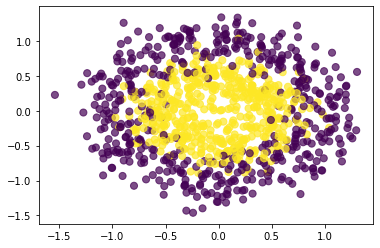

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 

np.random.seed(42) # define the seed (important to reproduce the results)

plt.figure(figsize=(6,4))

n_samples = 1000
data  = noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.2, random_state = 42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)


scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


from sklearn.metrics import precision_score

vprecision = {}

#arvore de decisão com critério de entropia
from sklearn import tree

model_DTC = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model_DTC.fit(x_train,y_train)
y_pred_DTC = model_DT.predict(x_test) 

precision_DTC = precision_score(y_test, y_pred_DTC, average="macro")
vprecision['Decision Tree'] = float('%.1f' % precision_DTC)

#SVC com C=10
from sklearn.svm import SVC

model_SVC = SVC(C = 10, gamma = 'auto')
model_SVC.fit(x_train,y_train)
y_pred_SVC = model_SVC.predict(x_test)

precision_SVC = precision_score(y_test, y_pred_SVC, average="macro")
vprecision['SVC'] = float('%.1f' % precision_SVC)

#floresta aleatória com n=100
from sklearn.ensemble import RandomForestClassifier

model_RFC =RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

model_RFC.fit(x_train,y_train)
y_pred_RFC = model_RFC.predict(x_test)

precision_RFC = precision_score(y_test, y_pred_SVC, average="macro")
vprecision['Random Forest'] = float('%.1f' % precision_RFC)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_NBC = GaussianNB()
model_NBC.fit(x_train,y_train)
y_pred_NBC = model_NBC.predict(x_test)

precision_NBC = precision_score(y_test, y_pred_NBC, average="macro")
vprecision['Naive Bayes'] = float('%.1f' % precision_NBC)

best_precision = [str(k)+ ": "+str(v) for k,v in vprecision.items() if k == max(vprecision, key=vprecision.get)]

print("Resposta: " + "Todos oferecem a mesma acurácia (considere apenas uma casa decimal)")
print()
print(vprecision)
print()
plt.show(True)

# Exercicio 3
Considere a base de dados da iris.  Usando o algoritmo random forest, qual é o atributo mais importante para a classificação? Considere o código abaixo para ler e preparar os dados.
```python
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/iris.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. todas tem a mesma importância</b><br>
<b>b. sepal_width</b><br>
<b>c. petal_width</b><br>
<b>d. sepal_length</b><br>
<b>e. petal_length</b><br>

Resposta:  petal_length


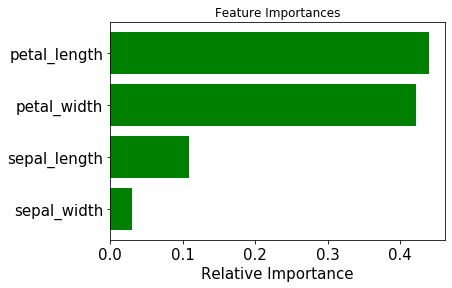

In [133]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/iris.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
    
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)

print('Resposta: ', lmeas_order[-1])

plt.show()

# Exercicio 4
Considere a base de dados da Vehicle.  Usando o algoritmo random forest, qual é o atributo mais importante para a classificação? Considere o código abaixo para ler e preparar os dados.
```python
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. Comp</b><br>
<b>b. D.Circ</b><br>
<b>c. Scat.Ra</b><br>
<b>d. Max.L.Ra</b><br>
<b>e. Max.L.Rect</b><br>

Resposta:  Max.L.Ra


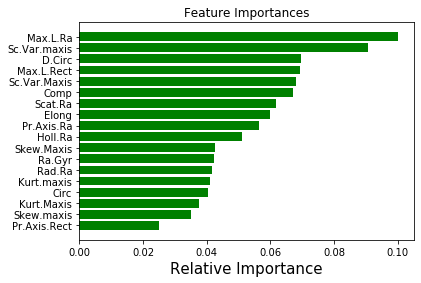

In [134]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)

print('Resposta: ', lmeas_order[-1])

plt.show()

# Exercicio 5
Considere a base BreastCancer. Qual o valor da área sob a curva Roc para o método SVM com C = 10? Considere o código abaixo para ler e preparar os dados. Arredonde para uma casa decimal.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. 0.7</b><br>
<b>b. 1.0</b><br>
<b>c. 0.5</b><br>
<b>d. 0.2</b><br>
<b>e. 0.1</b><br>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


#SVC com C=10
from sklearn.svm import SVC

model_SVC = SVC(C = 10, gamma = 'auto')
model_SVC.fit(x_train,y_train)
y_pred_SVC = model_SVC.predict(x_test)

precision_SVC = precision_score(y_test, y_pred_SVC, average="macro")

from sklearn.metrics import roc_auc_score

print("Resposta: ", '%.1f' % roc_auc_score(y_test, y_pred_SVC))


Resposta:  1.0
